# Reduce data 

In [14]:
%matplotlib widget
import numpy as np
import json, os, glob, numbers
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

In [15]:
pgroup = 'p22588'

runlist = [5]

jsonlist, runlist,_ = initialize(pgroup, runlist)

will reduce 1 run(s): [5]
Run name(s): ['run0005-knifeEdgeY']


In [16]:
channel_delay_motor = channel_delay_beckhoff

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

dir2save = ''

TT = None
saveflag = True

###########################################################
reducedir='/sf/alvra/data/{}/work/Test/{}'.format(pgroup, dir2save)

results_reduced = Reduce_scan_PP(reducedir, saveflag, jsonlist, TT, channel_delay_motor, 
                                 detector_XAS_1, detector_XAS_2, detector_Izero, tolerance=0.00001)

/sf/alvra/data/p22589/raw/run0005-knifeEdgeY/meta/scan.json
Step 1 of 31: Processing acq0001

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet          251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS  251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH1_VAL_GET     251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET     251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY        251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-L-BECKBS:PR1_CH4_VAL_GET 251 / 253 -> 1% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 249 / 253 -> 2% loss
complete channels: 0 / 6 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 100.0 Hz (delayed or dark)
Pump scheme is 0:1
Loaded 249 pump and 0 unpump shots


ValueError: `x` and `y` must have length at least 2.

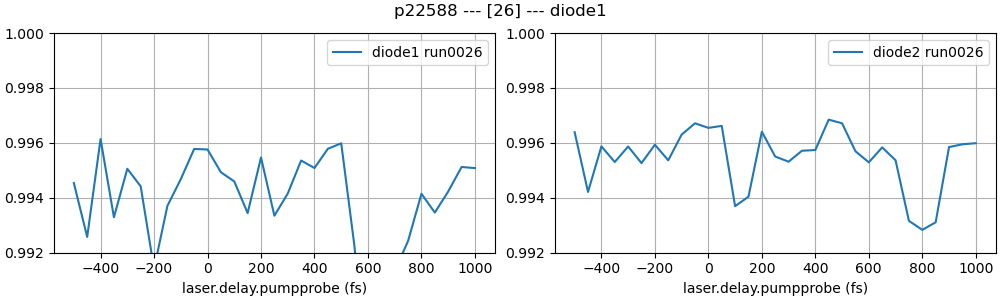

In [22]:
Plot_correlations_scan(pgroup, reducedir, run=runlist[0], path='raw', timescan=False, lowlim = 0.992)

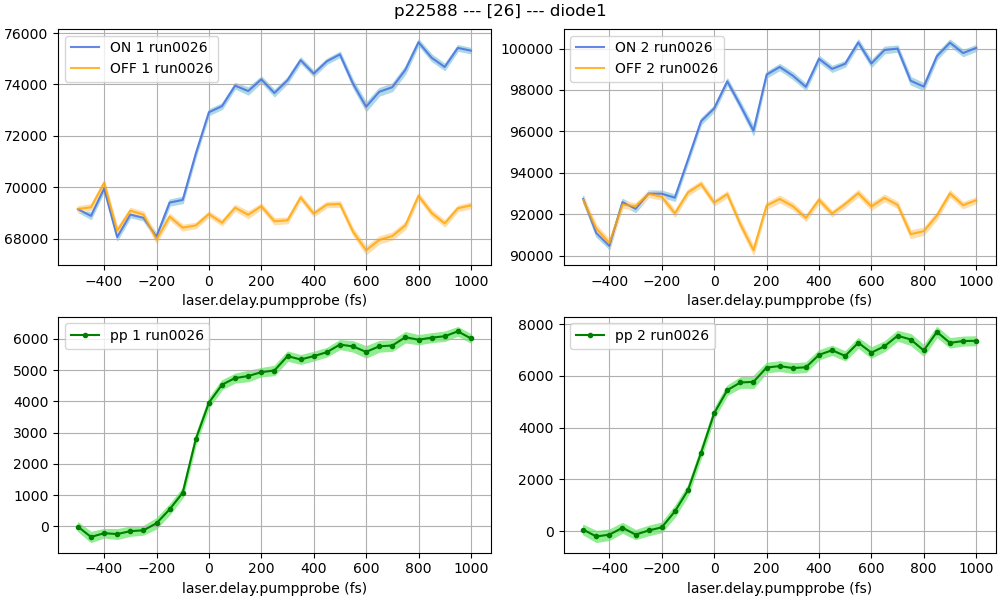

In [23]:
Plot_scan_2diodes(pgroup, reducedir, run=runlist[0], threshold=0, path='raw', timescan=False)

In [9]:
results_reduced.keys()

dict_keys(['pump_1', 'unpump_1', 'pump_2', 'unpump_2', 'Izero_pump', 'Izero_unpump', 'Delays_stage', 'arrTimes', 'Delays_corr', 'energy', 'scanvar', 'rbk', 'corr1', 'corr2'])

In [24]:
scanvar = results_reduced['scanvar']
GS =  results_reduced['unpump_1']
Izero_unpump = results_reduced['Izero_unpump']
readbacks = results_reduced['rbk']

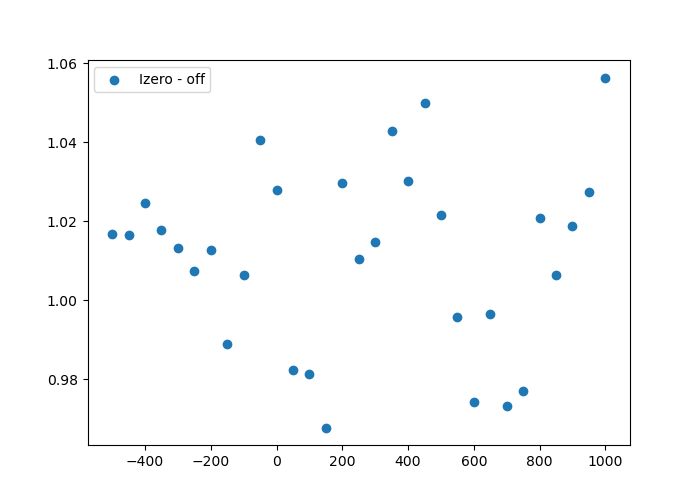

In [29]:

ordered = np.argsort(np.asarray(scanvar))
peaks, what = find_peaks(np.diff(np.array(scanvar)[ordered]))

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero = Izero_unpump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
#plt.suptitle(titlestring_stack+' -- 1 diode')
#plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
#plt.scatter(readbacks, np.array(G), label='GS')
#plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()